# 🌳 Decision Tree Example: Buying a Sports Watch
This notebook walks through:
- Creating a dataset with 3 features
- Building a decision tree classifier
- Visualizing the tree
- Making predictions

In [8]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Step 1: Create the dataset
data = pd.DataFrame({
    "Age": [22, 25, 47, 52, 46, 28],
    "Income": [30, 50, 90, 110, 70, 40],
    "Fitness": ["Low", "High", "Medium", "High", "High", "Medium"],
    "BuysWatch": ["No", "Yes", "No", "No", "Yes", "Yes"]
})
data

,Age,Income,Fitness,BuysWatch
0,22,30,Low,No
1,25,50,High,Yes
2,47,90,Medium,No
3,52,110,High,No
4,46,70,High,Yes
5,28,40,Medium,Yes


## 🔄 Convert Categorical 'Fitness' Column to Numeric (One-Hot Encoding)

In [9]:
data_encoded = pd.get_dummies(data, columns=["Fitness"], drop_first=True)
X = data_encoded.drop("BuysWatch", axis=1)
y = data_encoded["BuysWatch"].map({"No": 0, "Yes": 1})
X

,Age,Income,Fitness_Low,Fitness_Medium
0,22,30,True,False
1,25,50,False,False
2,47,90,False,True
3,52,110,False,False
4,46,70,False,False
5,28,40,False,True


## 📊 Train Decision Tree Classifier

In [10]:
model = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
model.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

## 🌲 Visualize the Tree

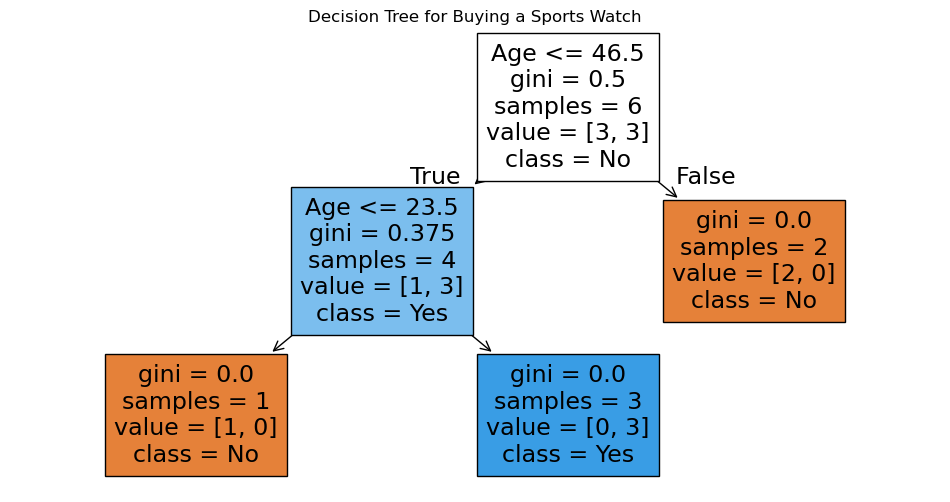

In [11]:
plt.figure(figsize=(12, 6))
plot_tree(model, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.title("Decision Tree for Buying a Sports Watch")
plt.show()

## 🔍 Make a Prediction
**Input**: Age = 30, Income = 45, Fitness = Medium

In [12]:
new_data = pd.DataFrame({
    "Age": [30],
    "Income": [45],
    "Fitness_Low": [0],
    "Fitness_Medium": [1]
})

prediction = model.predict(new_data)
prediction_proba = model.predict_proba(new_data)
prediction_label = "Yes" if prediction[0] == 1 else "No"
prediction_label, prediction_proba

('Yes', array([[0., 1.]]))